In [1]:
#linear algebra
import numpy as np

#Data preprocessing
import pandas as pd

#matlab style plotting
from matplotlib import pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

#ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
#Reading features and target data
train_x = pd.read_csv(C:\Users\Kehinde Adeniye\Documents\GitHub\Python-project" ,encoding="utf-8")
train_y = pd.read_csvC:\Users\Kehinde Adeniye\Documents\GitHub\Python-project", encoding="utf-8")

In [3]:
#merging features and target data together
join_train = pd.merge(train_x, train_y, on='row_id')
join_train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [4]:
#rows and columns of our data
join_train.shape
print("The dataset rows and columns are {}" .format(join_train.shape))

The dataset rows and columns are (500000, 23)


In [5]:
#information our dataset
join_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

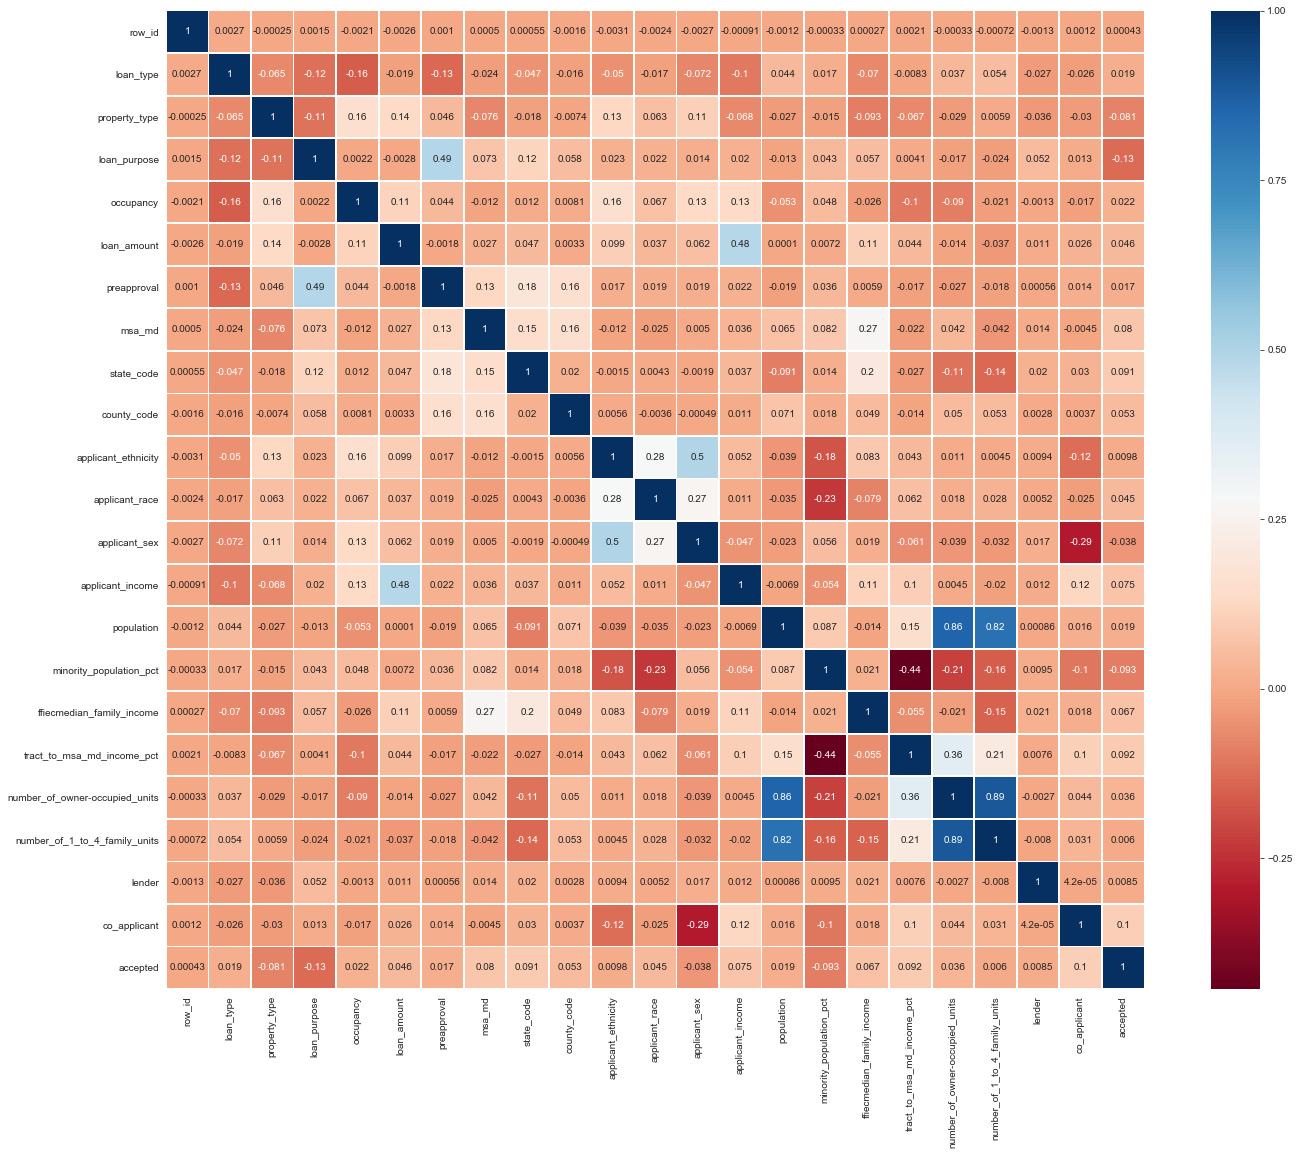

In [6]:
#plot heatmap to find correlation among features
corrmat =join_train.corr()
f, ax = plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, square=True, annot=True, linewidth=0.8, cmap='RdBu')

Text(0, 0.5, 'Loan Accepted')

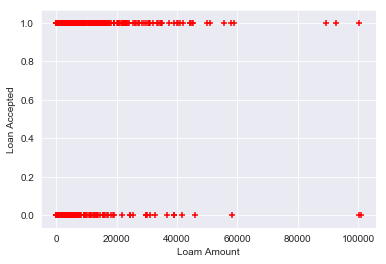

In [7]:
plt.scatter(join_train.loan_amount, join_train.accepted, marker='+', color ='red')
plt.xlabel("Loam Amount")
plt.ylabel("Loan Accepted")

In [8]:
join_train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [9]:
#lets check for missing value on train dataset
join_train.apply(lambda x: sum(x.isnull()), axis =0)

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [10]:
#filling missing data
join_train.fillna(-999,inplace=True)

In [11]:
#lets recheck if missing data has been treated
join_train.apply(lambda x: sum(x.isnull()), axis =0)

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

In [12]:
#One hot encode the categorical varaiables on train examples or use catboost from here
encode_co_applicant = pd.get_dummies(join_train.co_applicant)
encode_co_applicant.head()

,False,True
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [13]:
#merging encoded table to our data
train = pd.concat([join_train, encode_co_applicant], axis ="columns")
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,False,True
0,0,3,1,1,1,70.0,3,18,37,246,...,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,1,0
1,1,1,1,3,1,178.0,3,369,52,299,...,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,1,0
2,2,2,1,3,1,163.0,3,16,10,306,...,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,1,0
3,3,1,1,1,1,155.0,1,305,47,180,...,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,1
4,4,1,1,1,1,305.0,3,24,37,20,...,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,1,0


In [14]:
train_xy = train.drop(['row_id','co_applicant'],axis=1)

In [15]:
train_xy.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted,False,True
0,3,1,1,1,70.0,3,18,37,246,2,...,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,1,1,0
1,1,1,3,1,178.0,3,369,52,299,1,...,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,1,0
2,2,1,3,1,163.0,3,16,10,306,2,...,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,1,1,0
3,1,1,1,1,155.0,1,305,47,180,2,...,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,0,1
4,1,1,1,1,305.0,3,24,37,20,2,...,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,1,1,0


In [16]:
x = train_xy.drop('accepted',axis=1)
x.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,False,True
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,1,0
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,1,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,1,0
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,0,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,1,0


In [35]:
y =join_train.accepted

In [38]:
#train_test_split libraries
from sklearn.model_selection import train_test_split

In [39]:
#logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [40]:
train =0.70
validate =0.15
test =0.15

In [41]:
xtrain, xtest,ytrain,ytest= train_test_split(x,y, test_size=1-train)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size= test/(test+validate))

In [42]:
print(xtrain,xval,xtest)

        loan_type  property_type  loan_purpose  occupancy  loan_amount  \
185384          1              1             3          1        192.0   
472223          1              1             3          1        295.0   
358571          1              1             1          1         32.0   
215538          1              1             2          1         10.0   
492423          2              1             3          1        125.0   
134140          3              1             3          1        166.0   
187003          2              1             3          1        100.0   
42761           1              1             3          1        112.0   
92128           1              1             3          1         94.0   
376308          1              1             3          1        103.0   
408522          1              1             1          1        153.0   
96136           1              1             1          1        285.0   
103549          1              1      

[75000 rows x 22 columns]         loan_type  property_type  loan_purpose  occupancy  loan_amount  \
61393           1              1             3          1        141.0   
443974          1              1             1          1         86.0   
434078          1              1             3          1        193.0   
102371          1              1             1          1        481.0   
137043          1              1             2          1         74.0   
147555          1              1             3          1        250.0   
478141          3              1             1          1        166.0   
453877          1              1             3          1        137.0   
493046          2              1             3          1        187.0   
48694           1              1             1          1        187.0   
127677          1              1             1          2         78.0   
178678          1              1             3          1        789.0   
178034      

In [43]:
#training the model
logmodel =LogisticRegression()

In [44]:
#splitting data into train
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
from sklearn.metrics import accuracy_score

In [50]:
print('the train accuracy is :{:.6f}'.format(accuracy_score(ytest, logmodel.predict(xtest), logmodel.predict(xval))))

the test accuracy is :0.634325


### EXPLORATORY DATA ANALYSIS